以下のパラメータでシミュレーションを実行した結果。

```
trial_count = 20
agent_count = 10^3
generations = 10^3

network_type_list = [:scale_free_4, :scale_free_6, :scale_free_8, :regular_4, :random_4]
weak_selection_list = [true, false]
calc_payoffs_pattern_list = [1, 2, 3]
hop_game_list = [1, 2, 3, 4, 5]
hop_learning_list = [1, 2, 3, 4, 5]
b_list = [2.0, 3.0, 4.0, 5.0]
μ_list = [0.00, 0.01]
δ_list = [0.1, 0.3, 0.5, 0.7, 0.9]
```

このノートでは、hopG = 1 の場合に絞って結果を確認する。

hopG ≧ 2 については、AllParam3.ipynb を参照。

In [1]:
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.5, style = 'darkgrid')

In [2]:
COLUMNS = ['network_type', 'weak_selection', 'calc_pattern', 'hop_game', 'hop_learning', 'b', 'μ', 'δ', 'trial', 'step', 'cooperator_rate']
GROUPBY_COLUMNS = [c for c in COLUMNS if c not in ['weak_selection', 'hop_game', 'trial', 'step', 'cooperator_rate']]

def load_df_all(csv_file_name: str) -> pd.DataFrame:
    dtype = {i: 'object' for i in range(len(COLUMNS))}
    dtype[len(COLUMNS) - 2] = 'int'
    dtype[len(COLUMNS) - 1] = 'float64'
    return pd.read_csv(csv_file_name, header=None, names=COLUMNS, dtype=dtype)

In [3]:
# Load
df_list = [load_df_all('data/20220501_185340/{}.csv'.format(csv)) for csv in range(1, 21)]
df = pd.concat(df_list)
assert df.shape == (24600000, 11)

# Transform
df = df[(df.step >= 800) & (df.hop_game == '1')].reset_index(drop=True)
df.loc[df.weak_selection == 'false', ['δ']] = 'XX'
df = df.groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()
df

,network_type,calc_pattern,hop_learning,b,μ,δ,cooperator_rate
0,random_4,1,1,2.0,0.0,0.1,0.000000
1,random_4,1,1,2.0,0.0,0.3,0.000000
2,random_4,1,1,2.0,0.0,0.5,0.000000
3,random_4,1,1,2.0,0.0,0.7,0.000000
4,random_4,1,1,2.0,0.0,0.9,0.000000
...,...,...,...,...,...,...,...
3595,scale_free_8,3,5,5.0,0.01,0.3,0.022100
3596,scale_free_8,3,5,5.0,0.01,0.5,0.007789
3597,scale_free_8,3,5,5.0,0.01,0.7,0.000000
3598,scale_free_8,3,5,5.0,0.01,0.9,0.000000


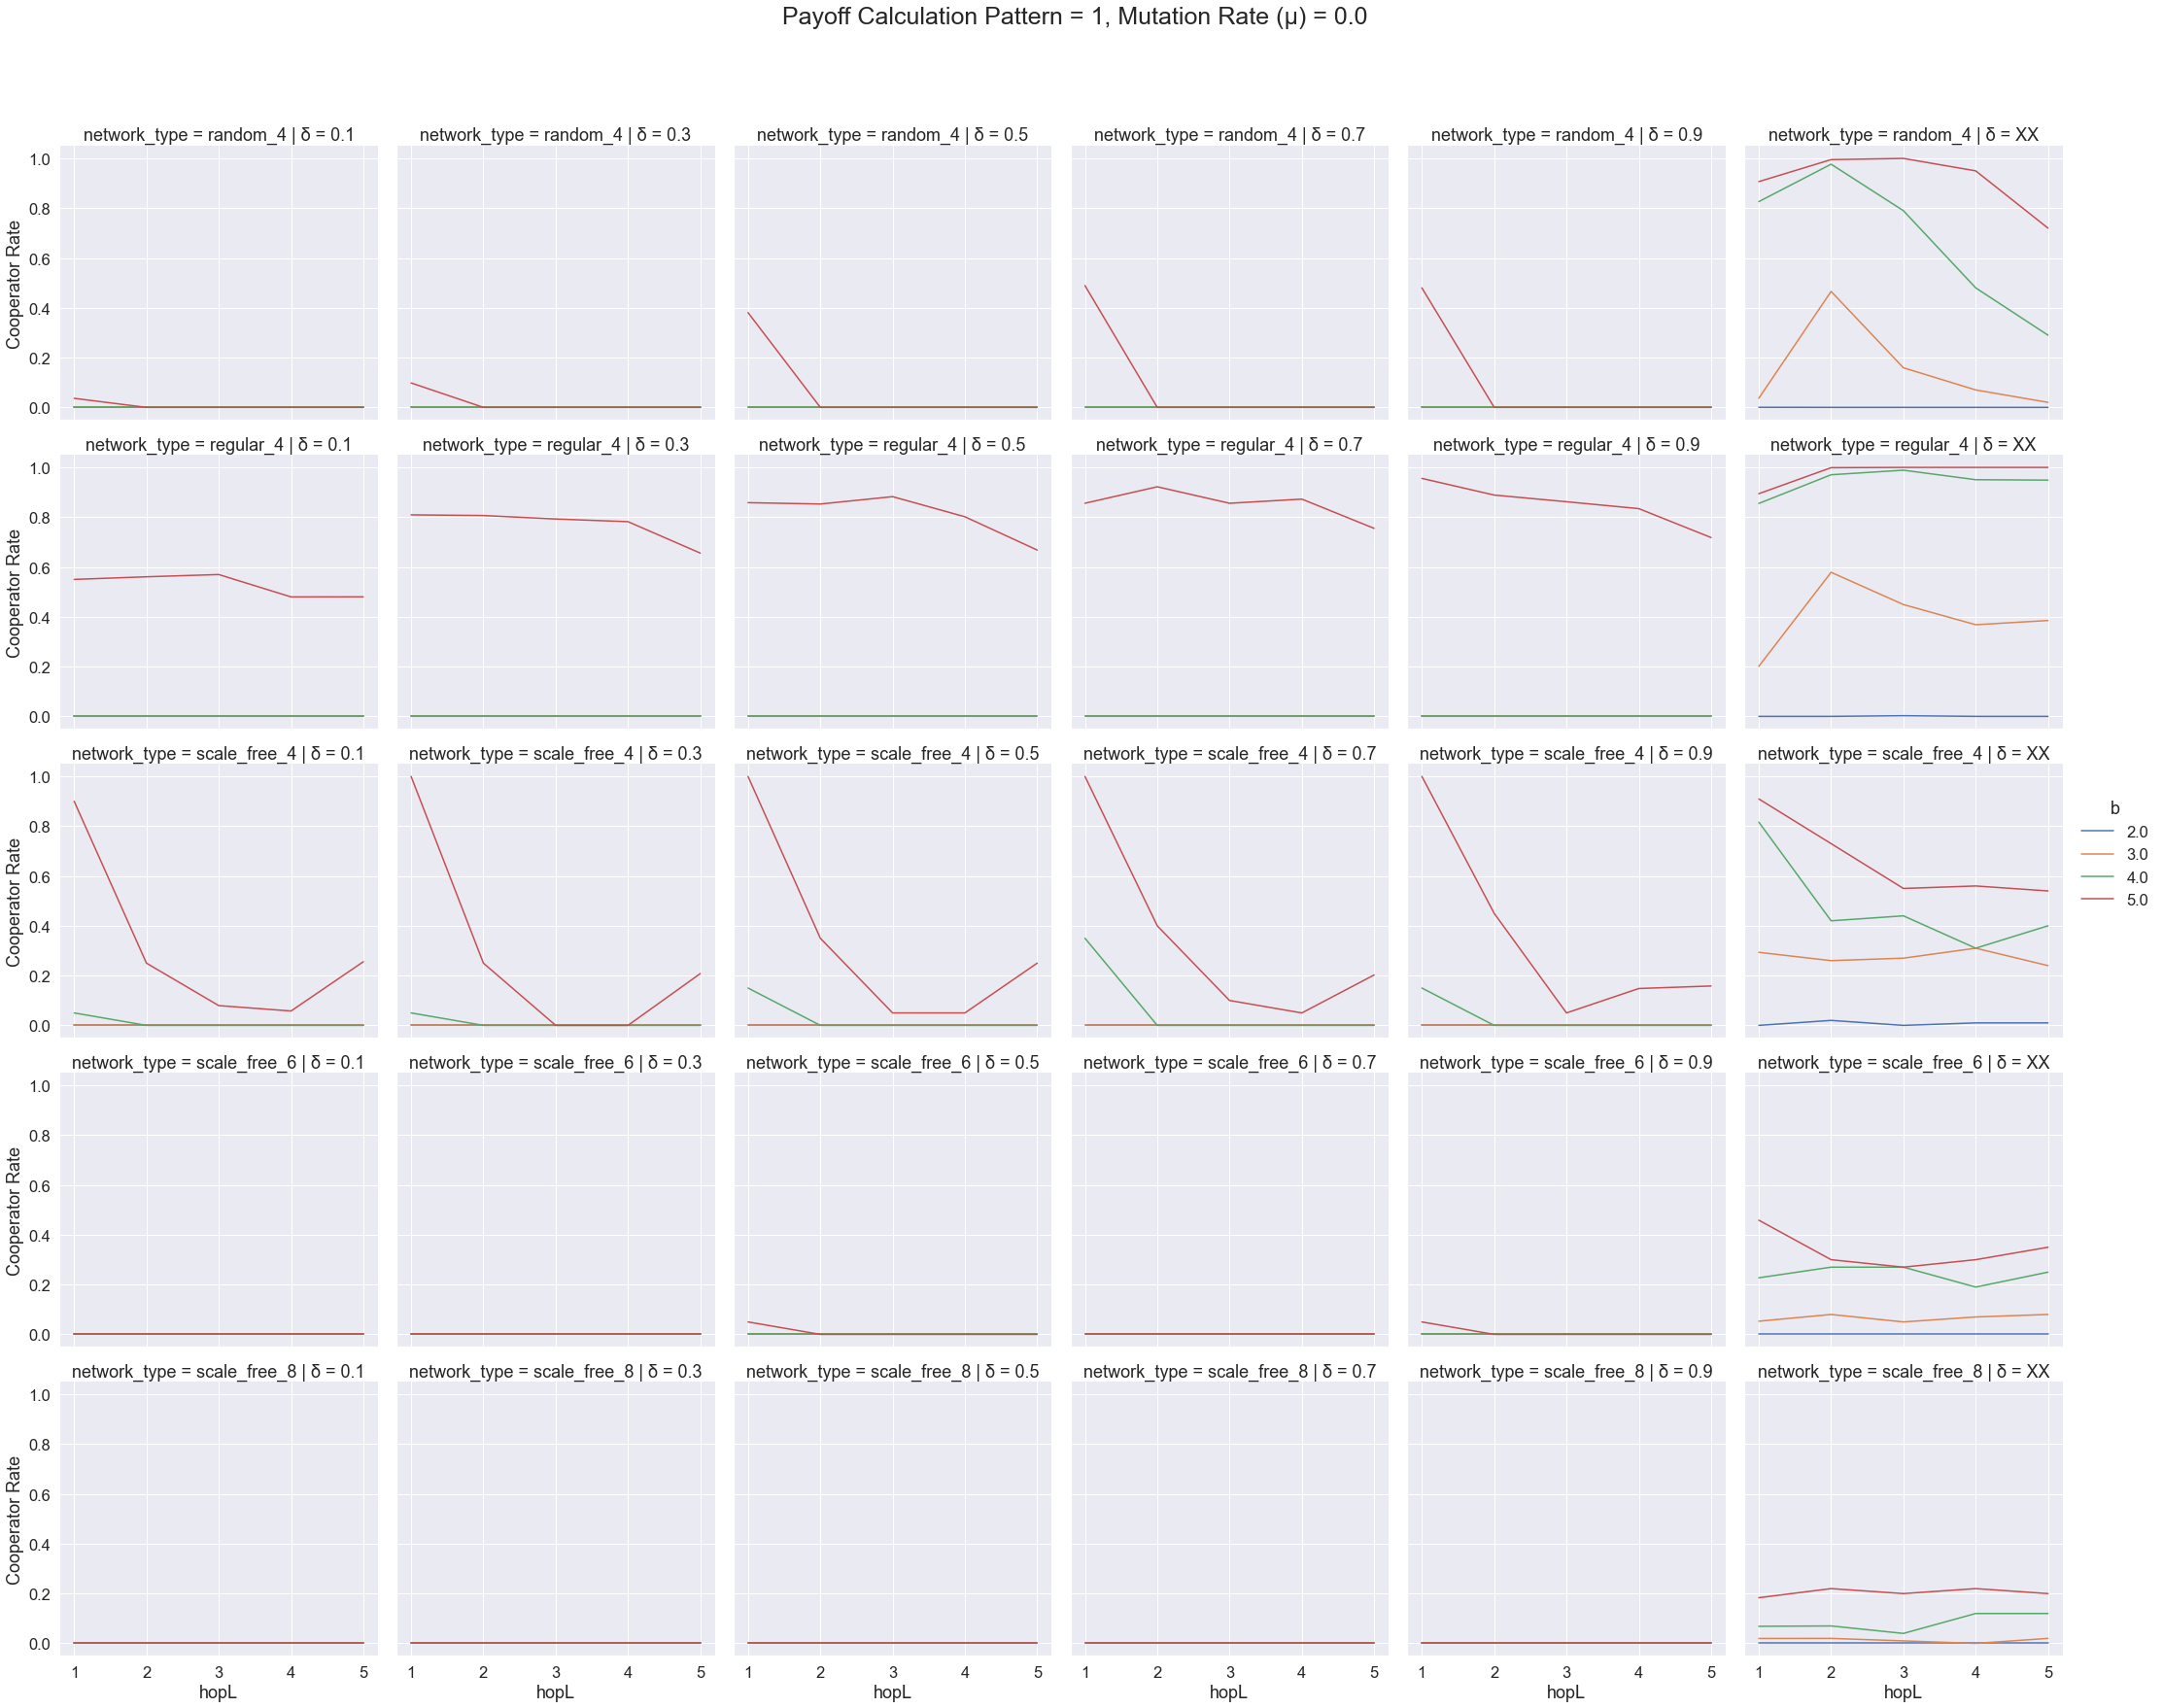

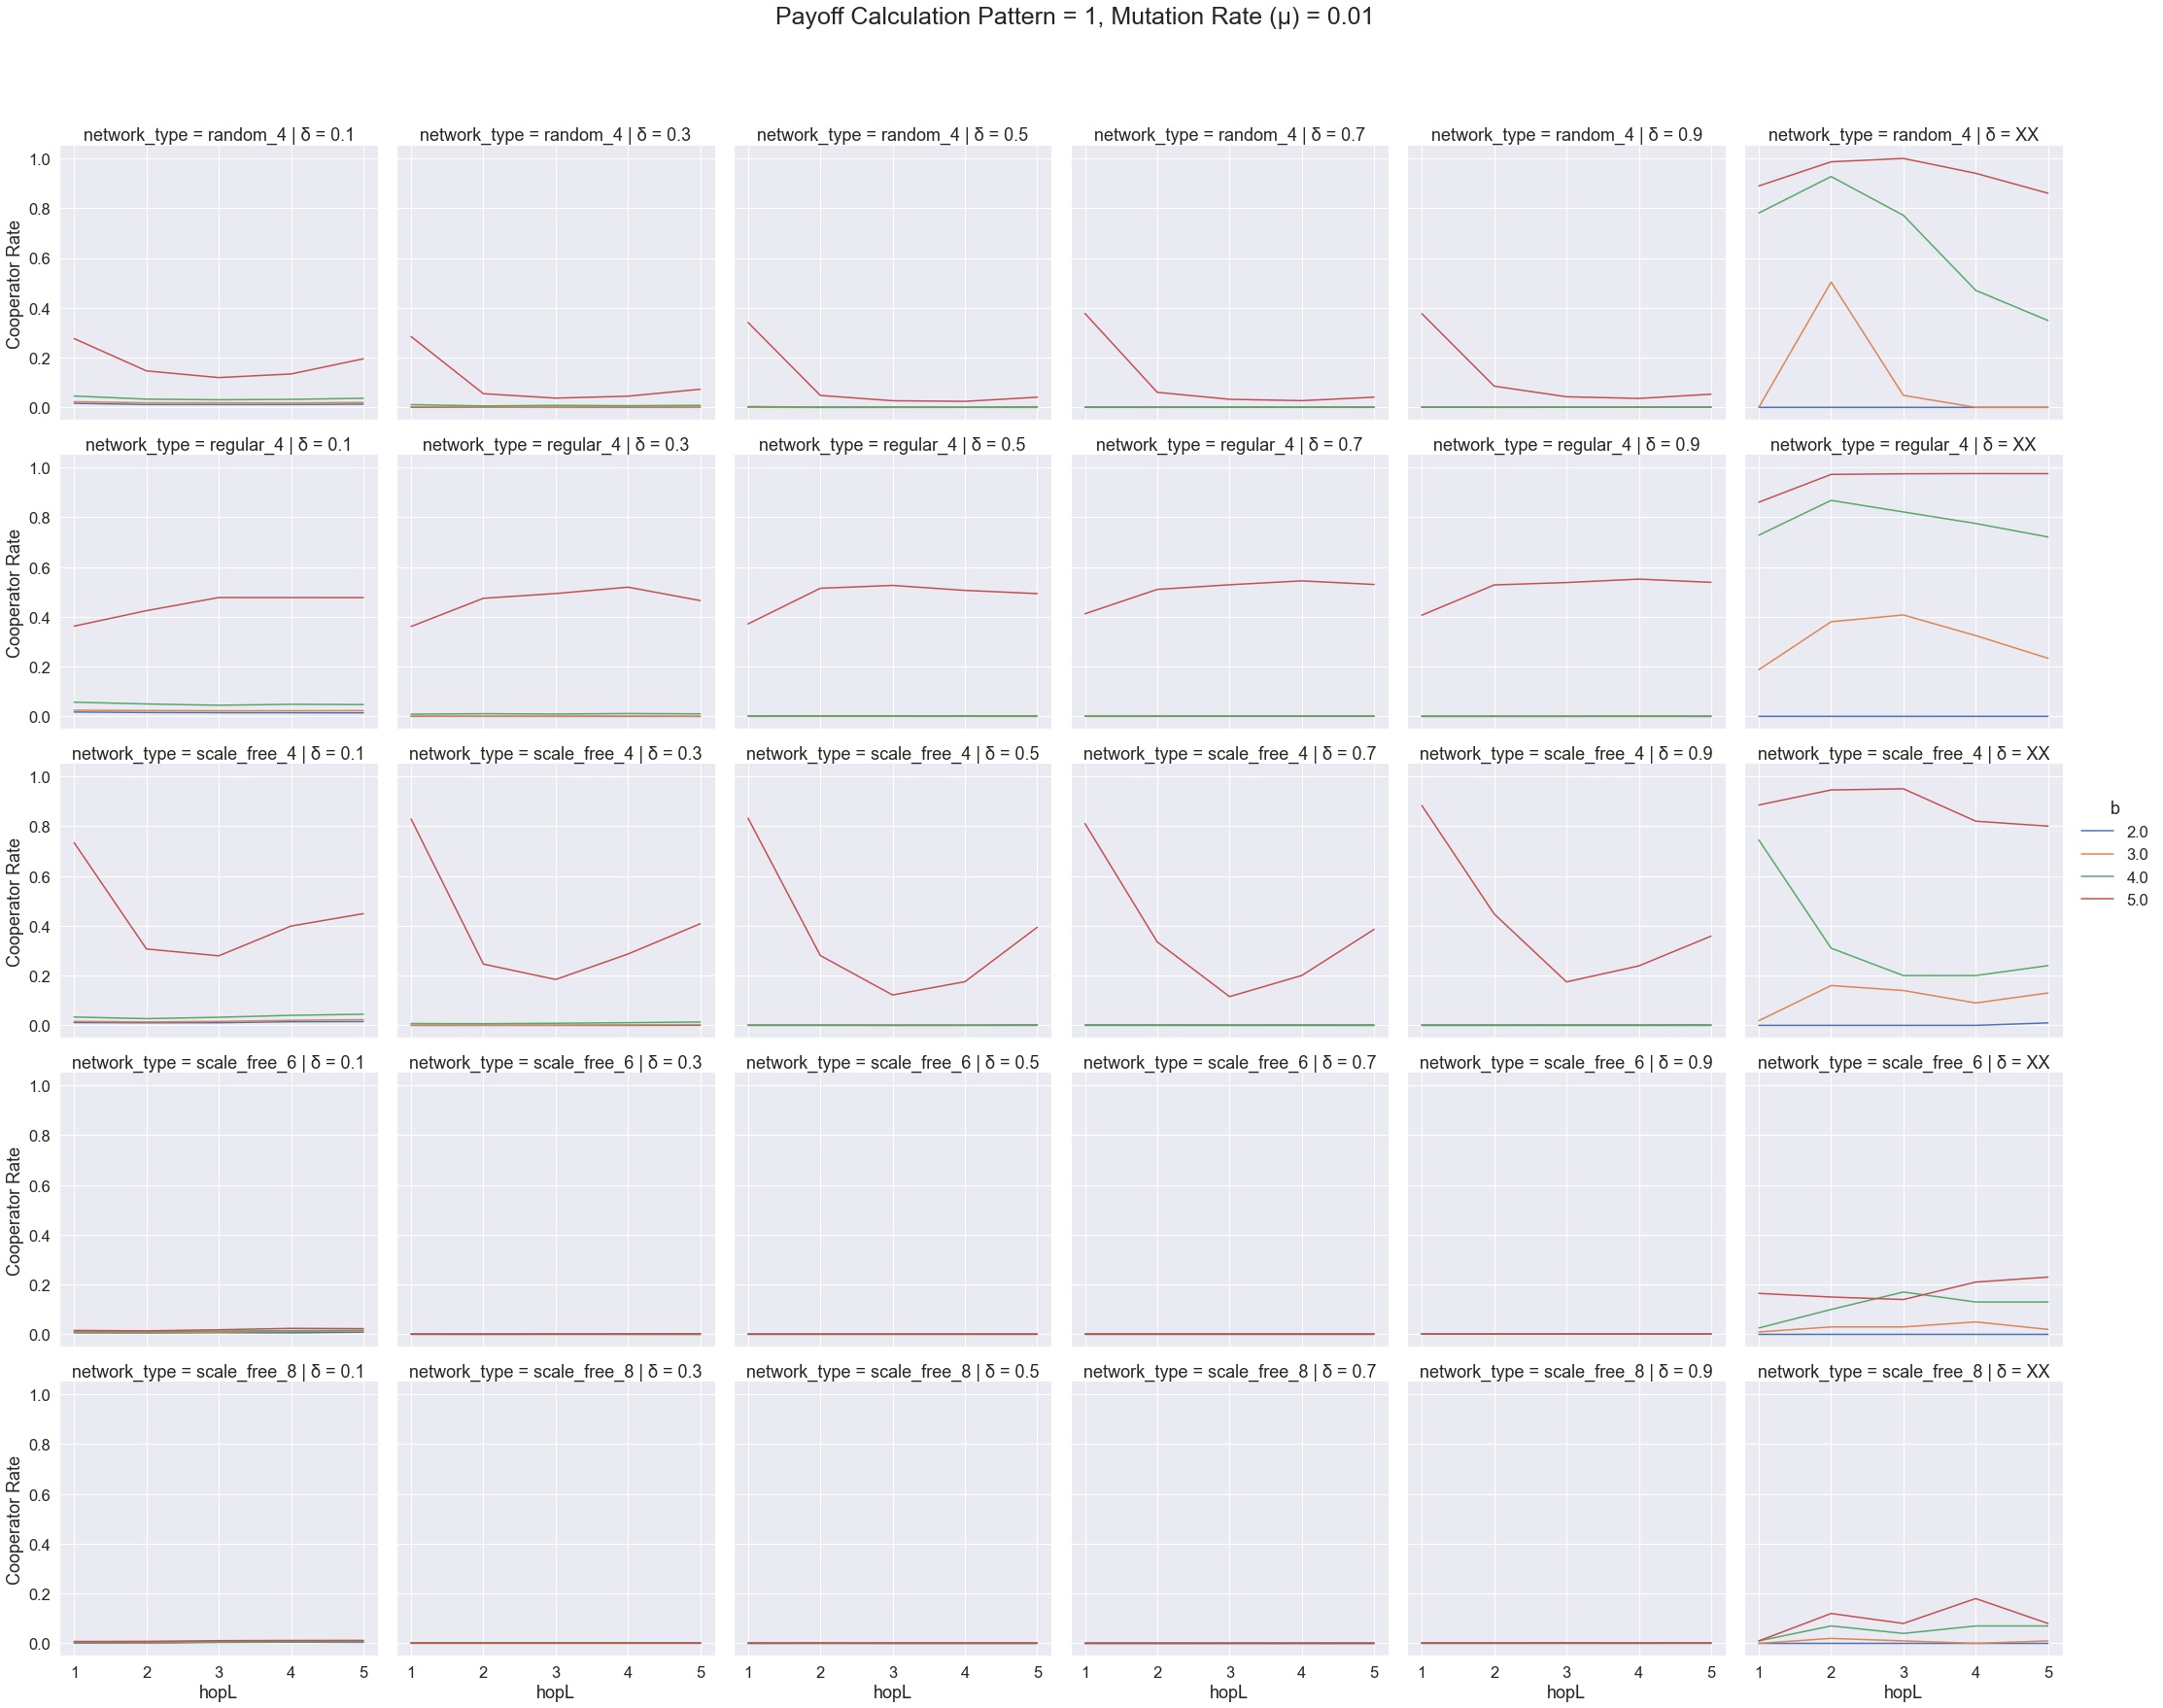

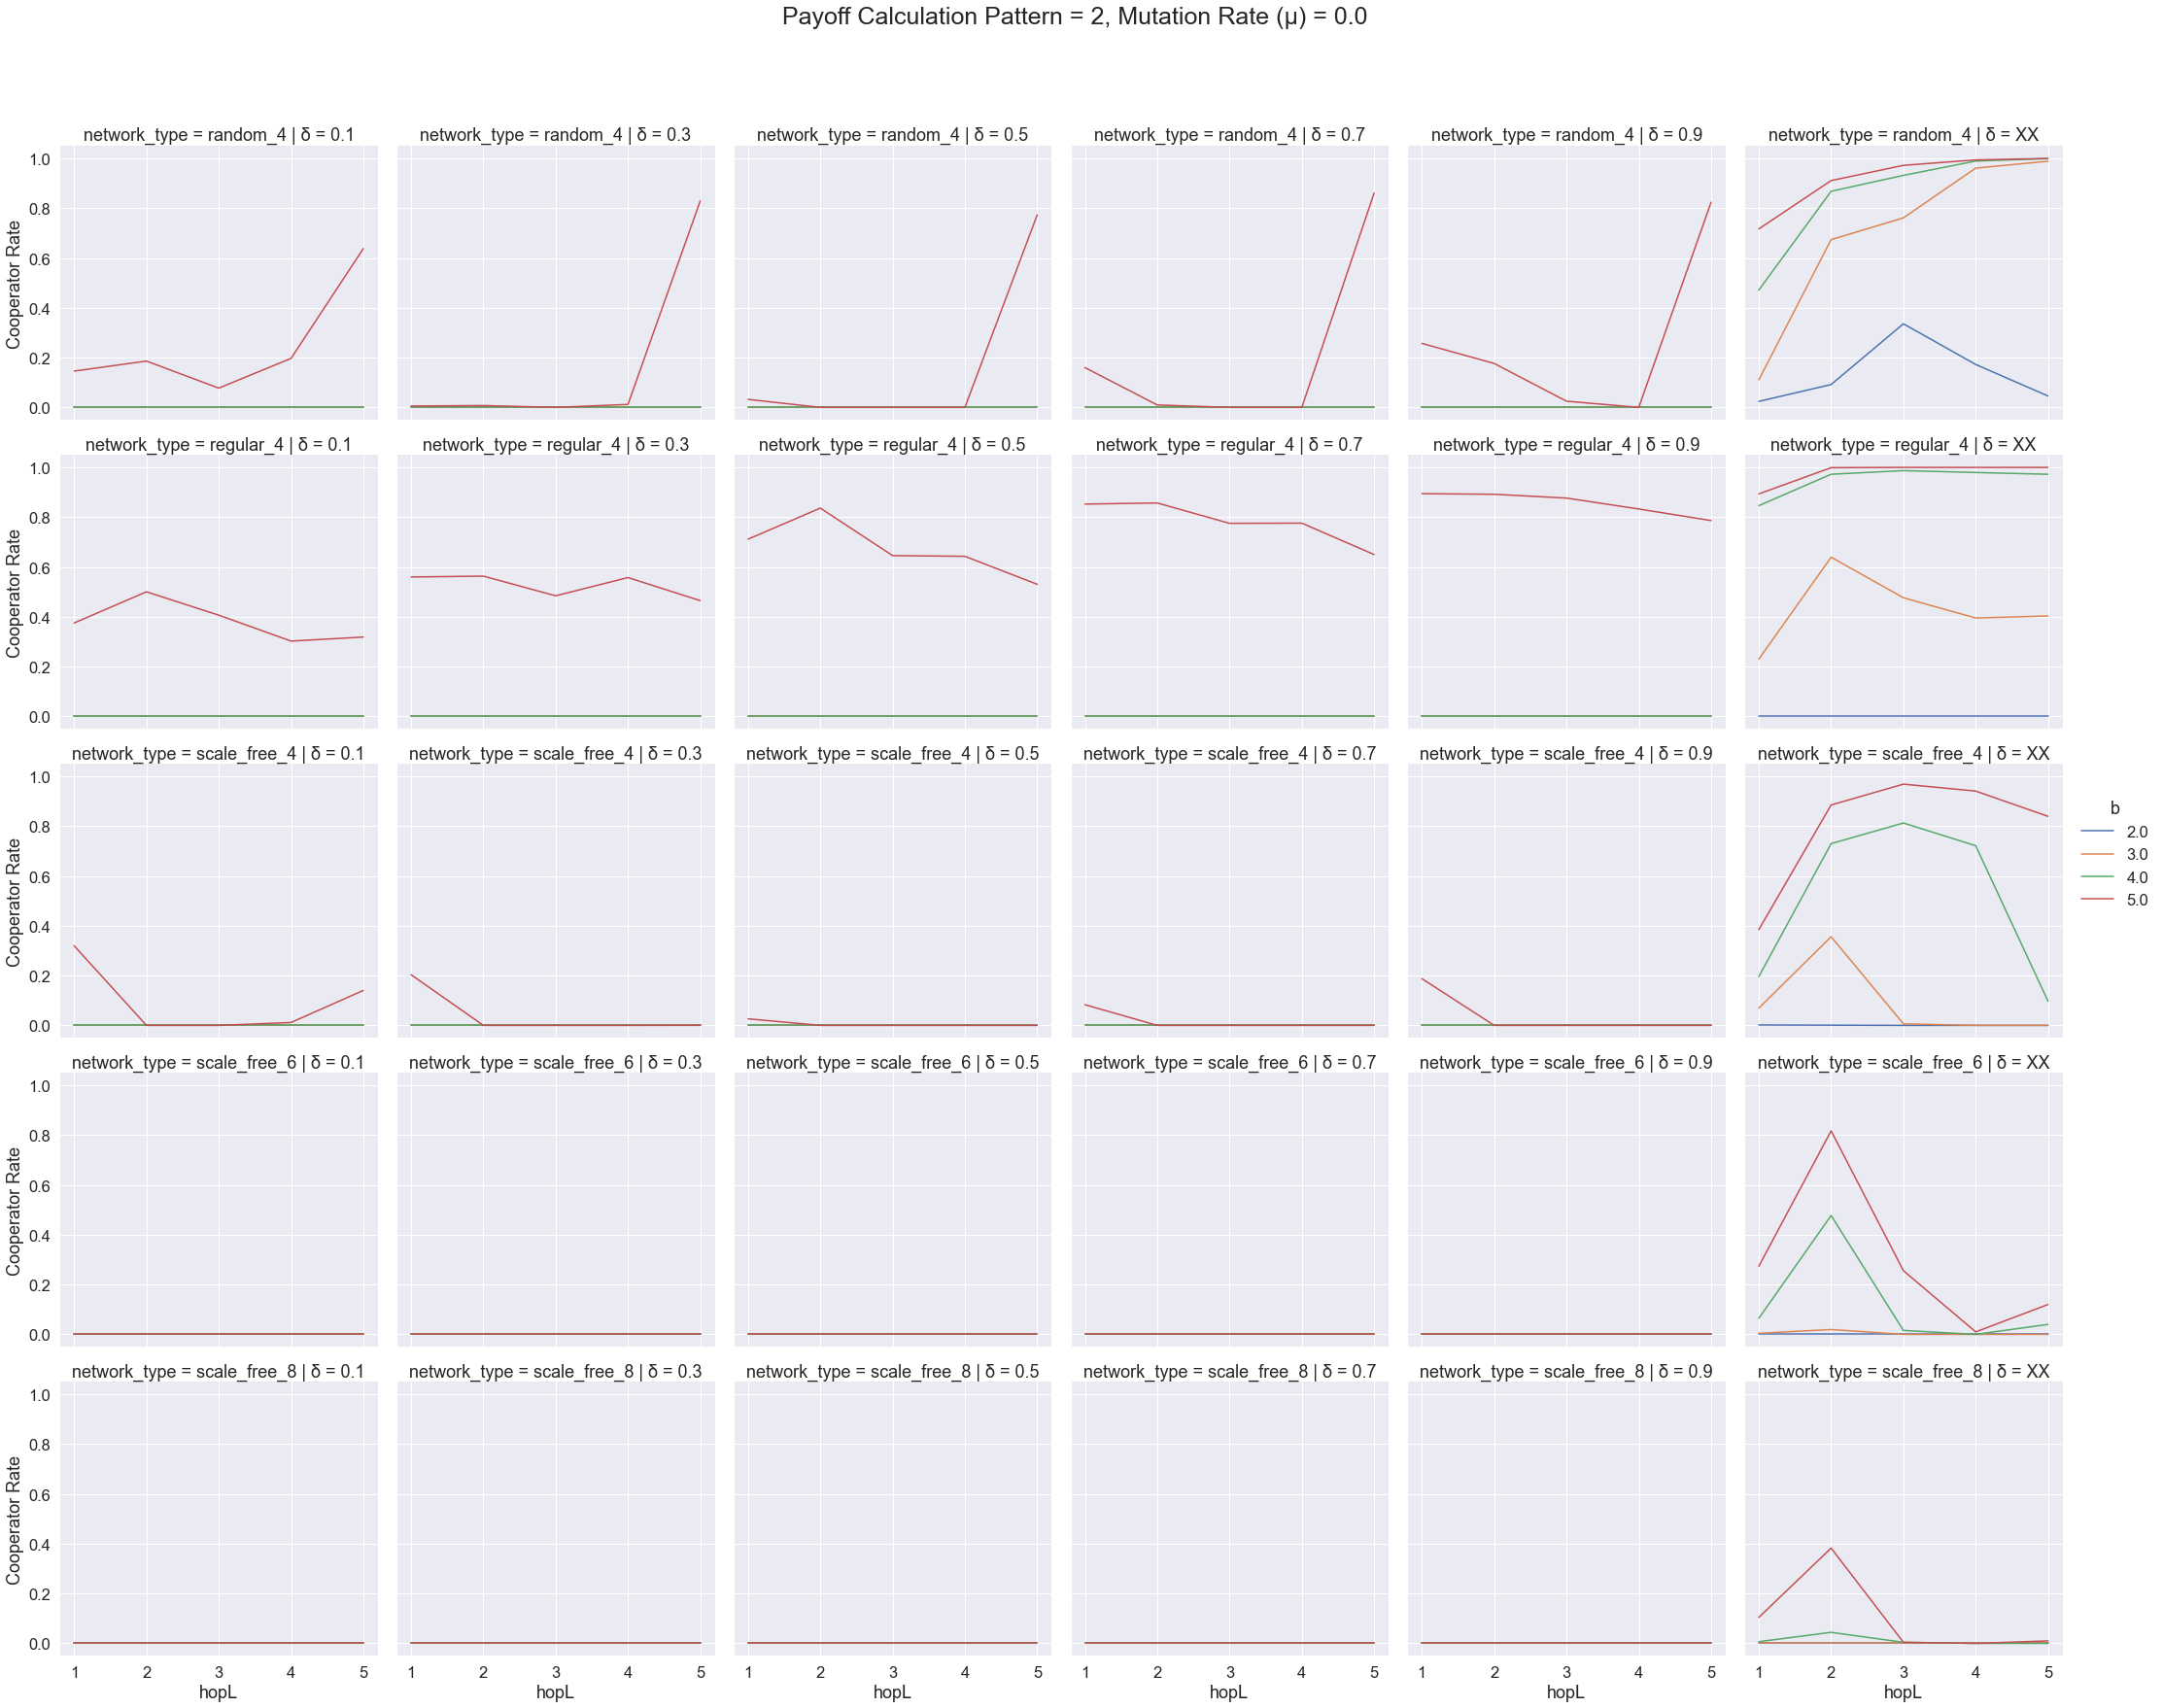

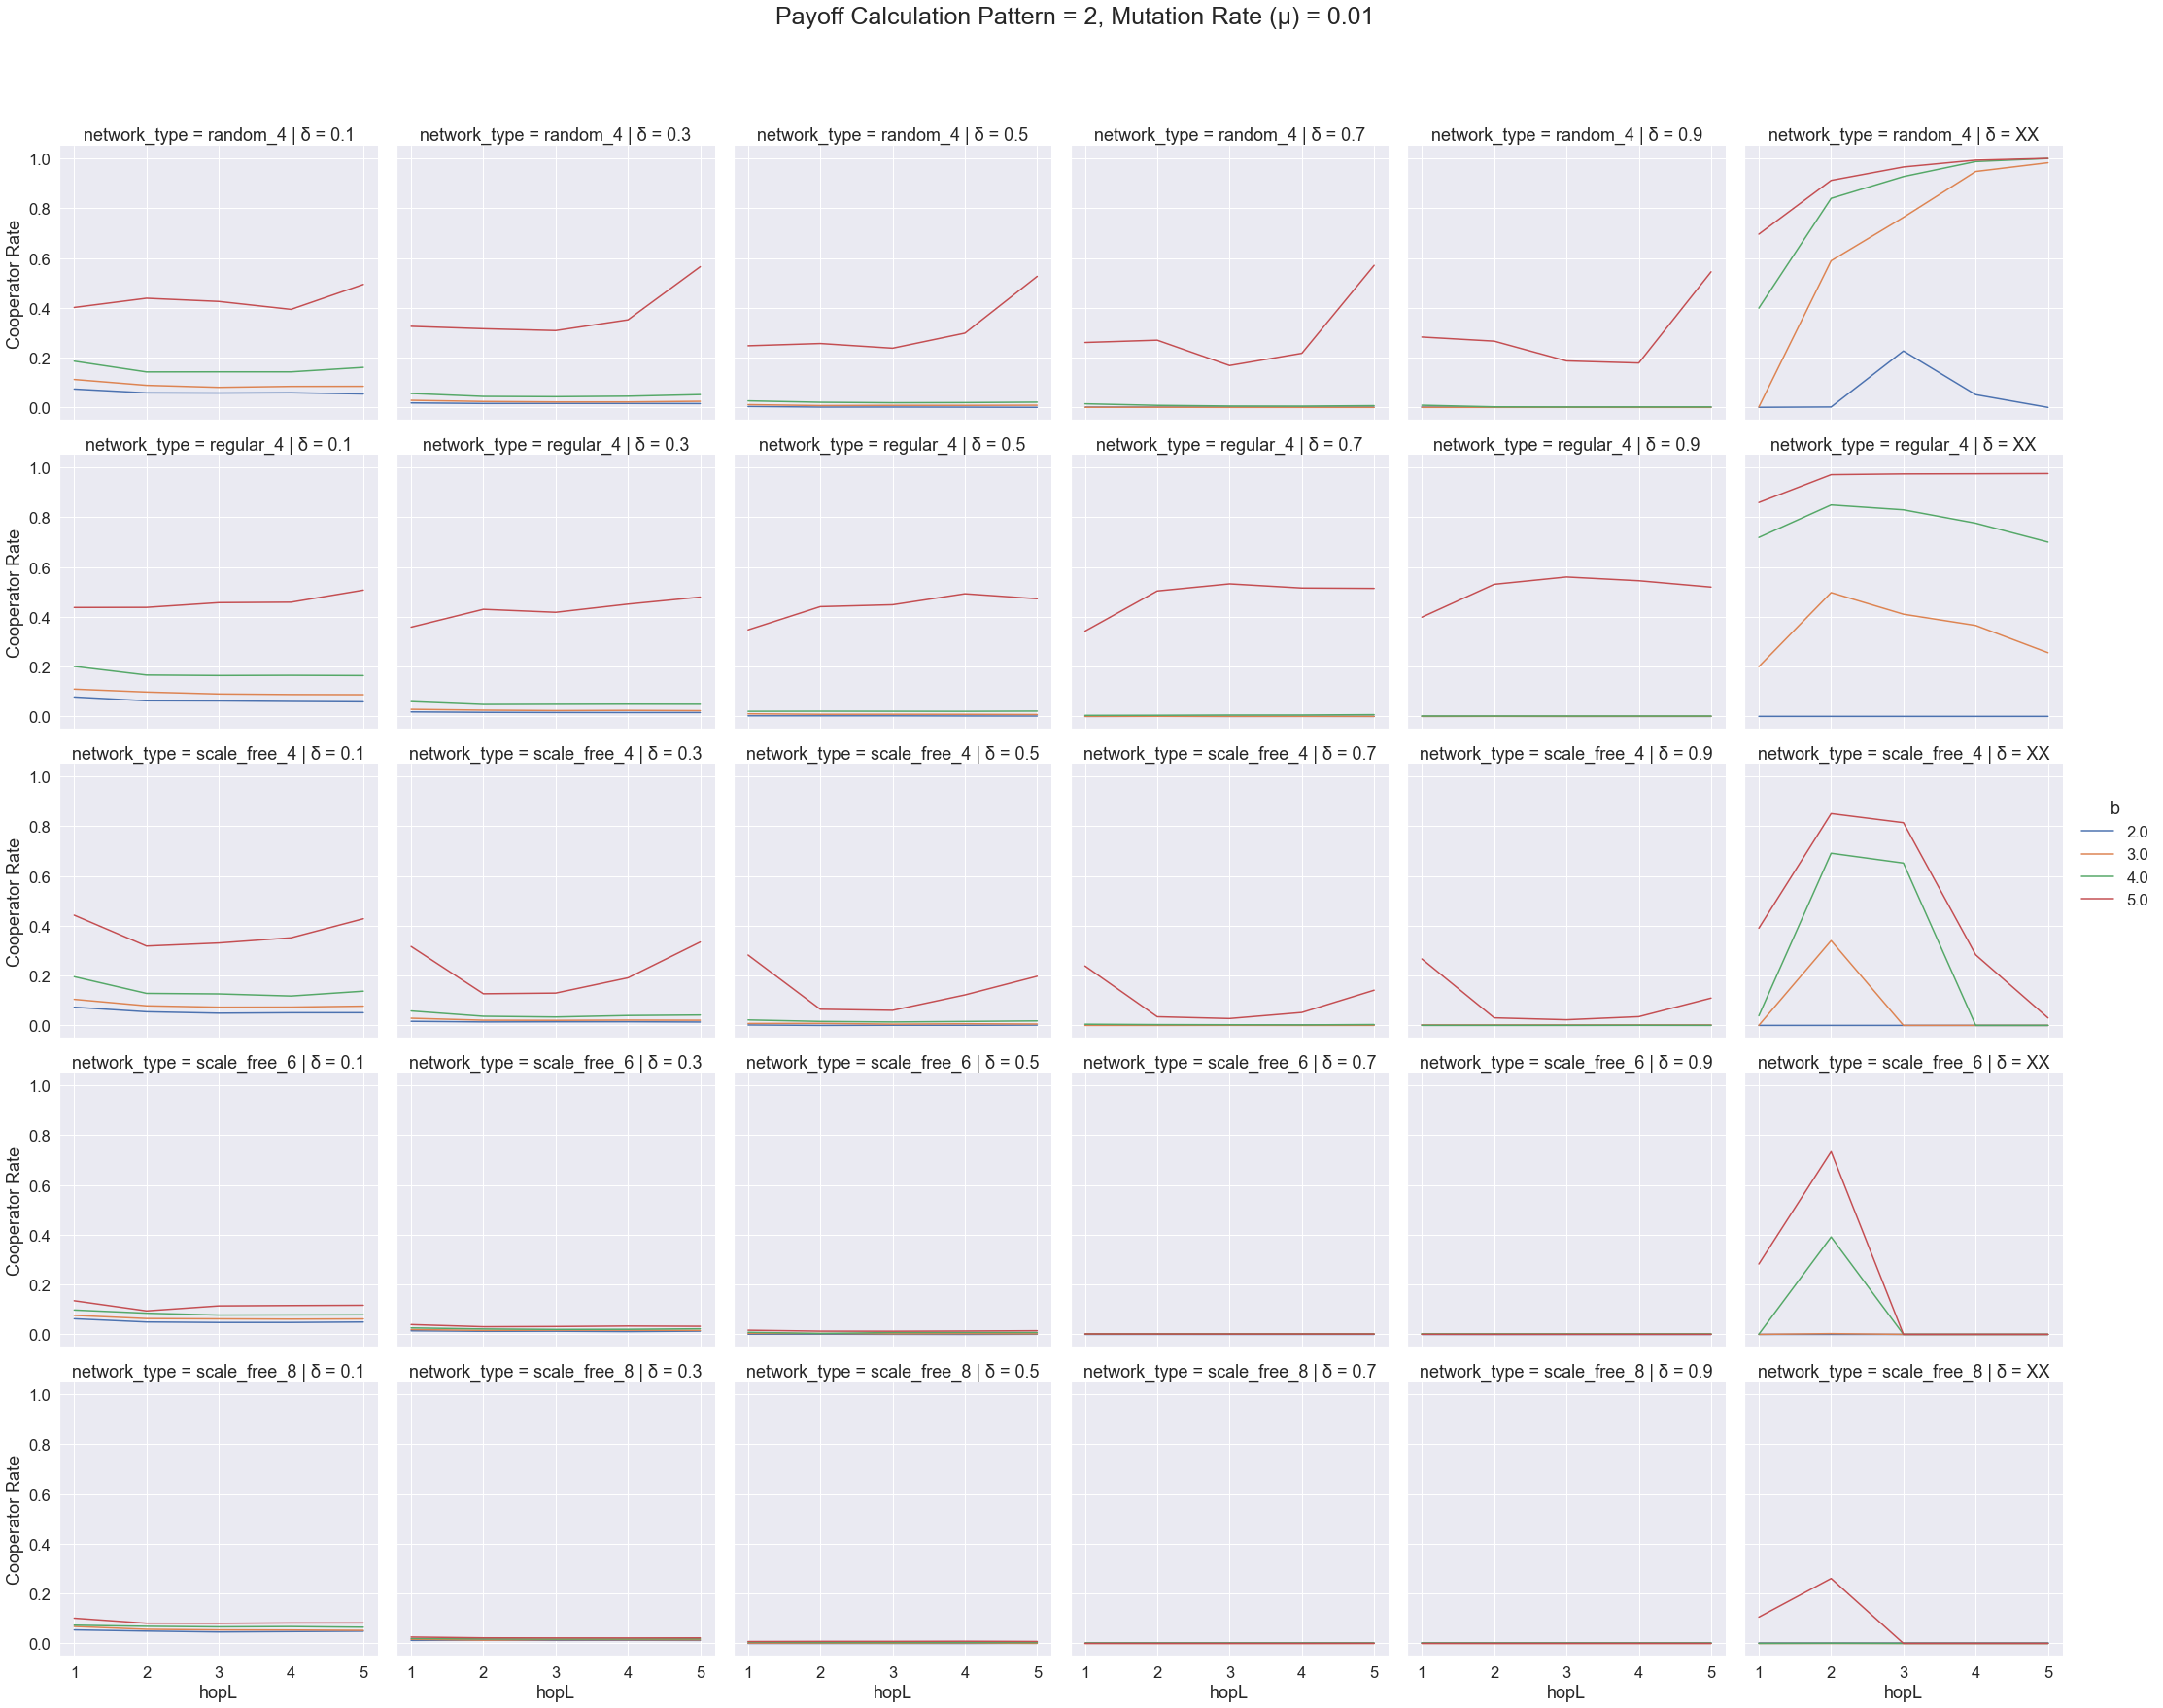

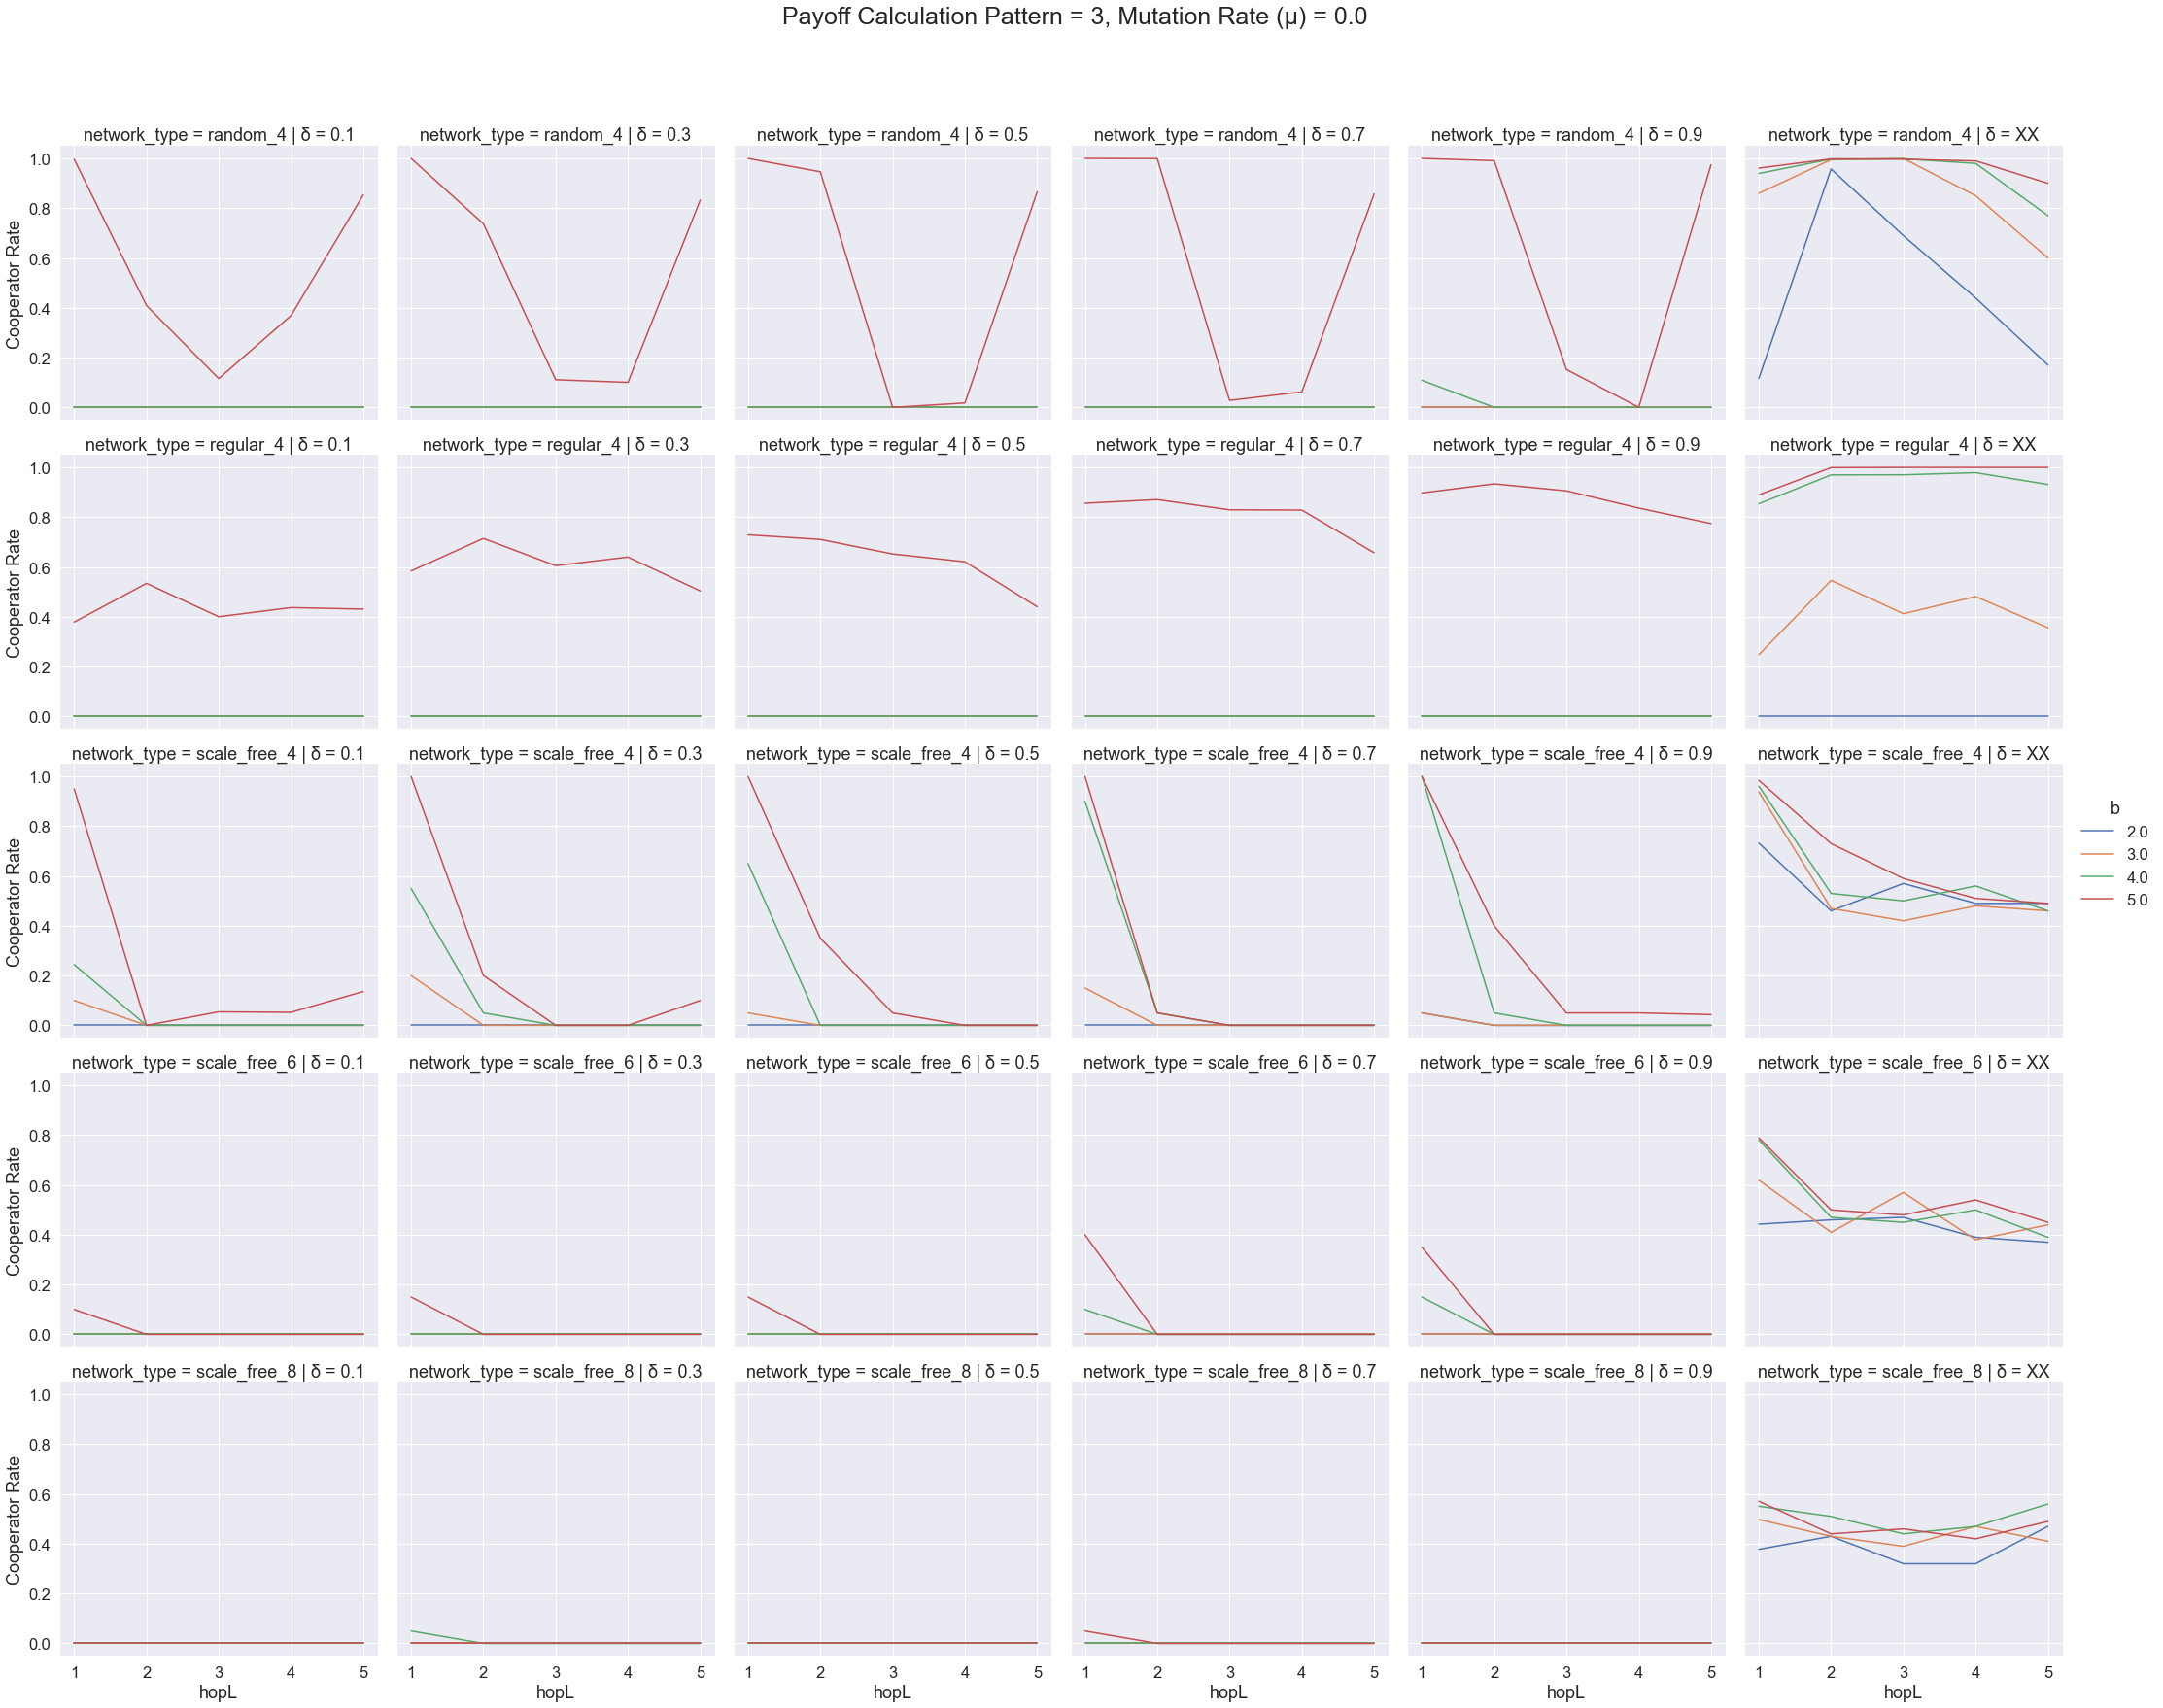

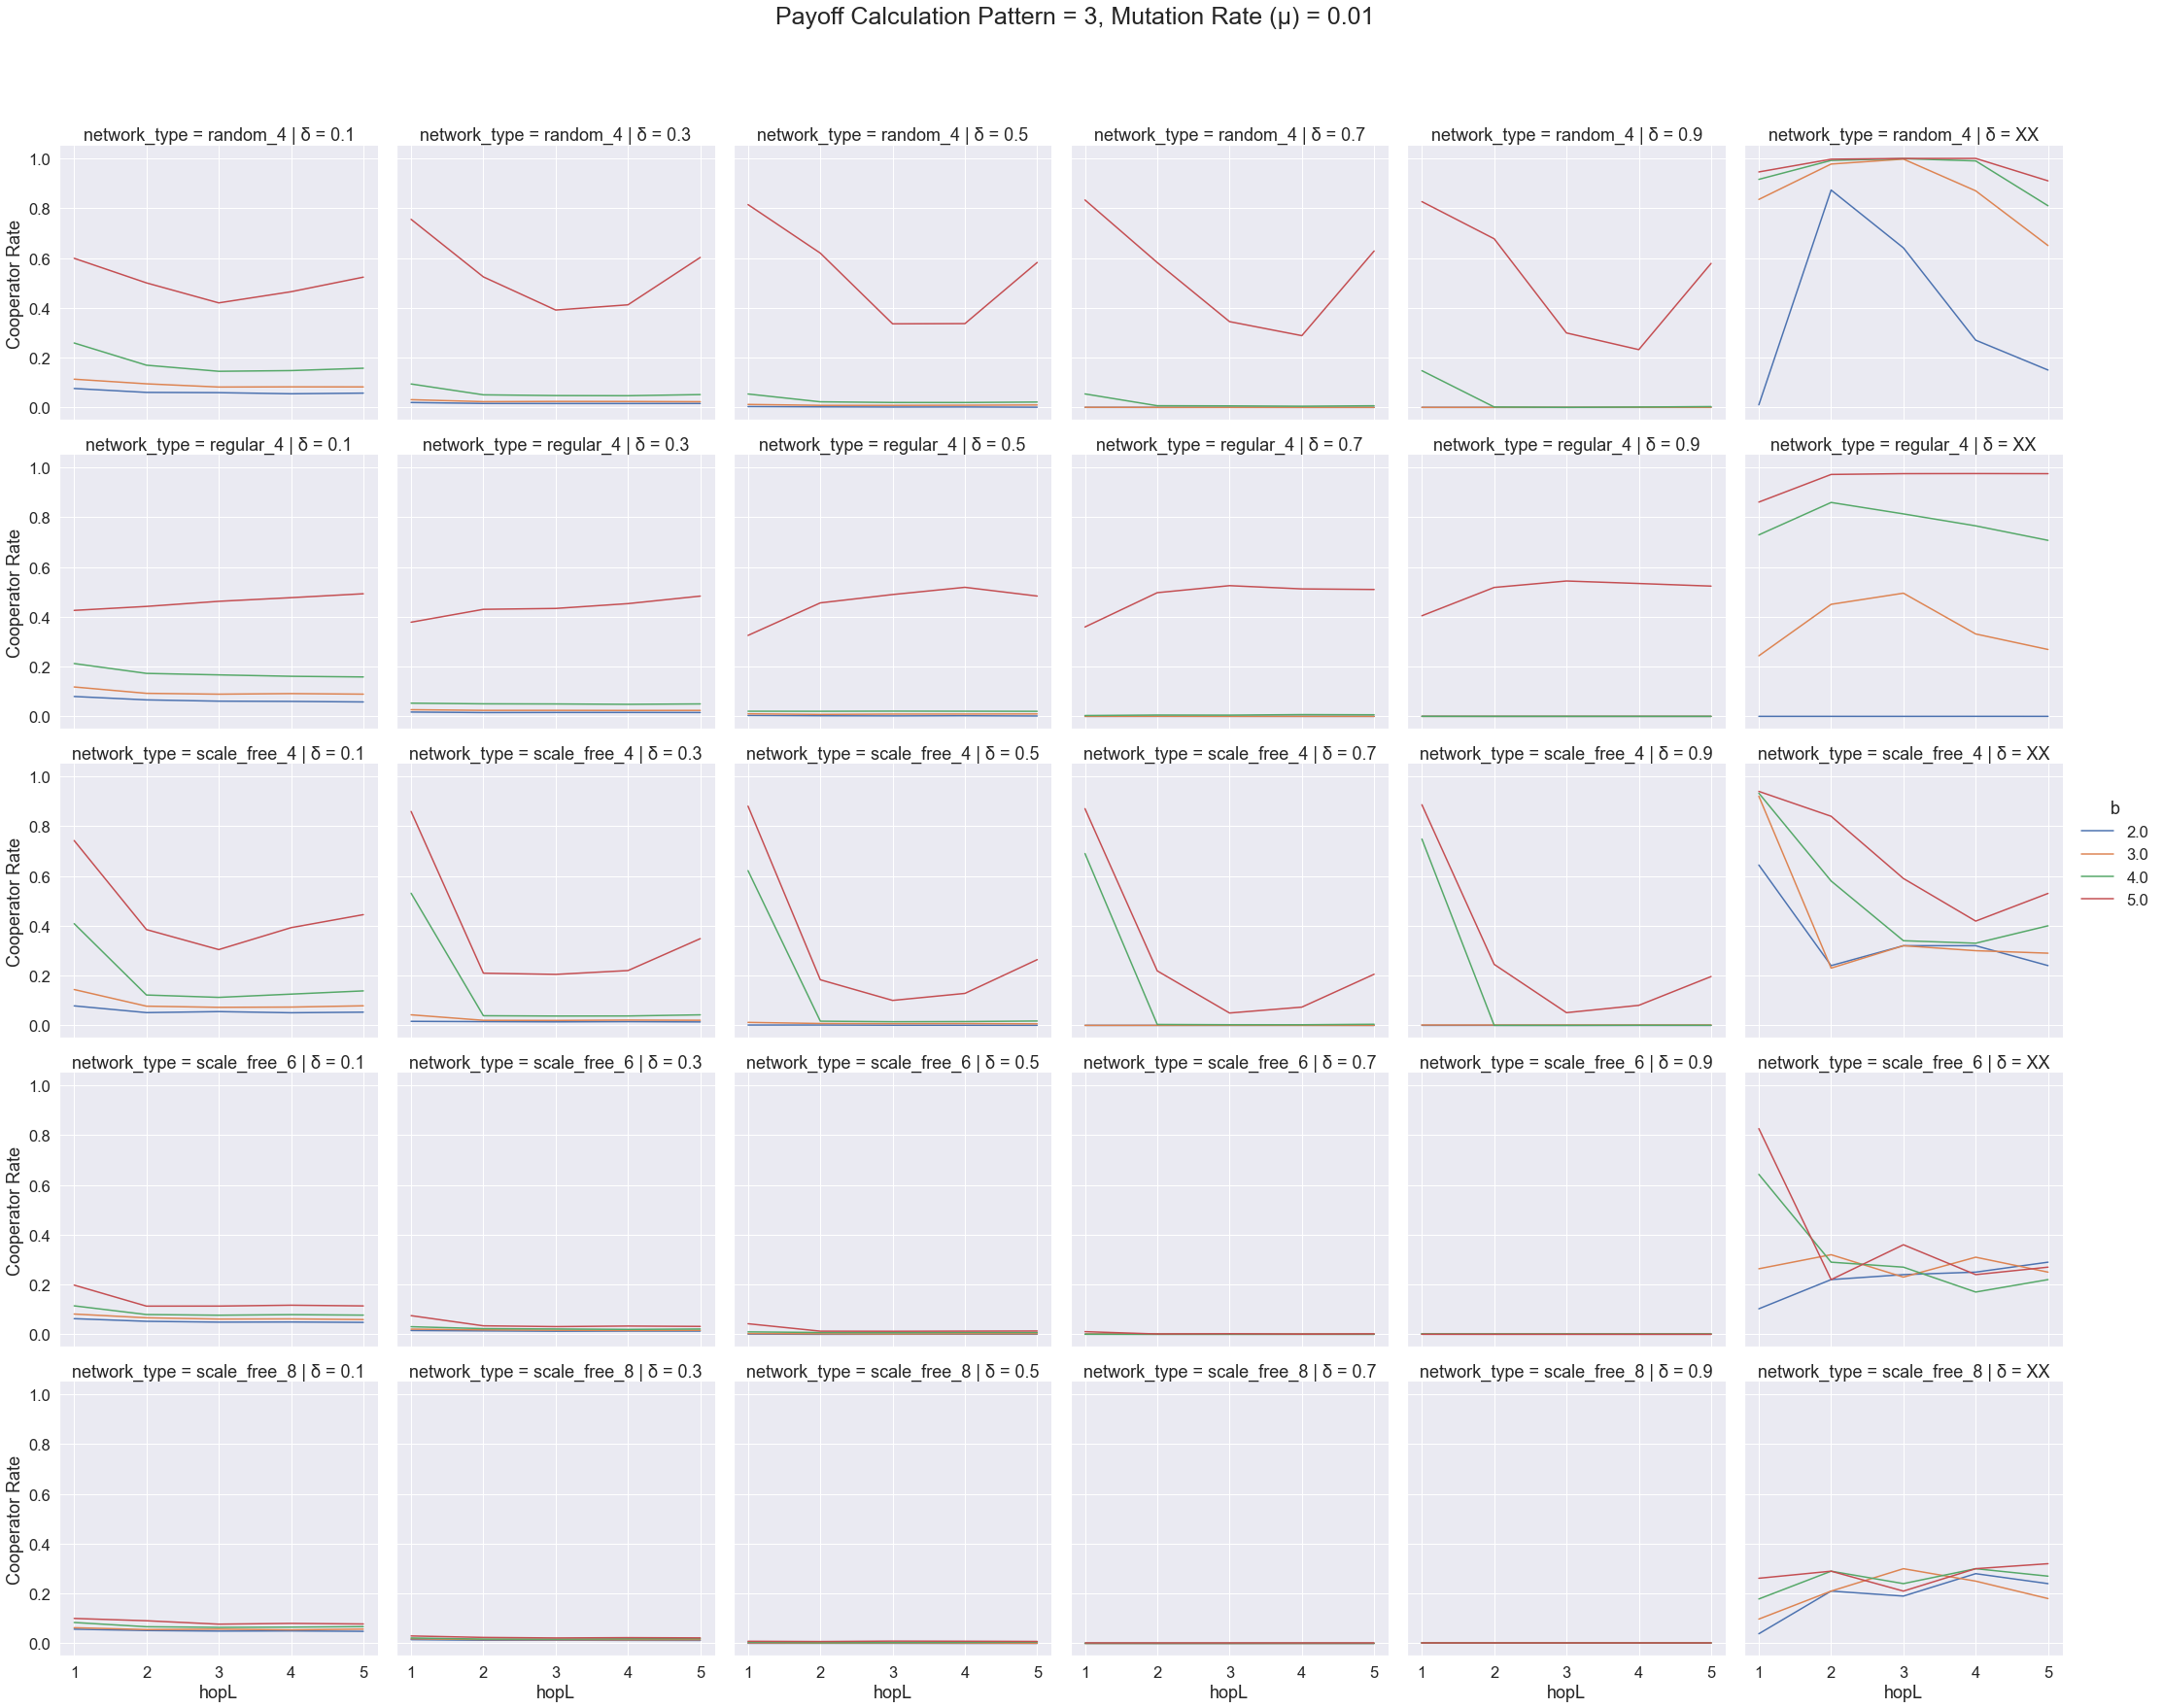

In [4]:
for (_, μ, calc_pattern) in df[['μ', 'calc_pattern']].drop_duplicates().itertuples():
    _df = df[(df.μ == μ) & (df.calc_pattern == calc_pattern)]
    g = sns.relplot(kind='line', x='hop_learning', y='cooperator_rate', hue='b', row='network_type', col='δ', data=_df)
    g.set_axis_labels('hopL', 'Cooperator Rate')
    g.fig.suptitle('Payoff Calculation Pattern = {}, Mutation Rate (μ) = {}'.format(calc_pattern, μ), size=25)
    g.fig.subplots_adjust(top=.9)

見るべきデータにフォーカスする。

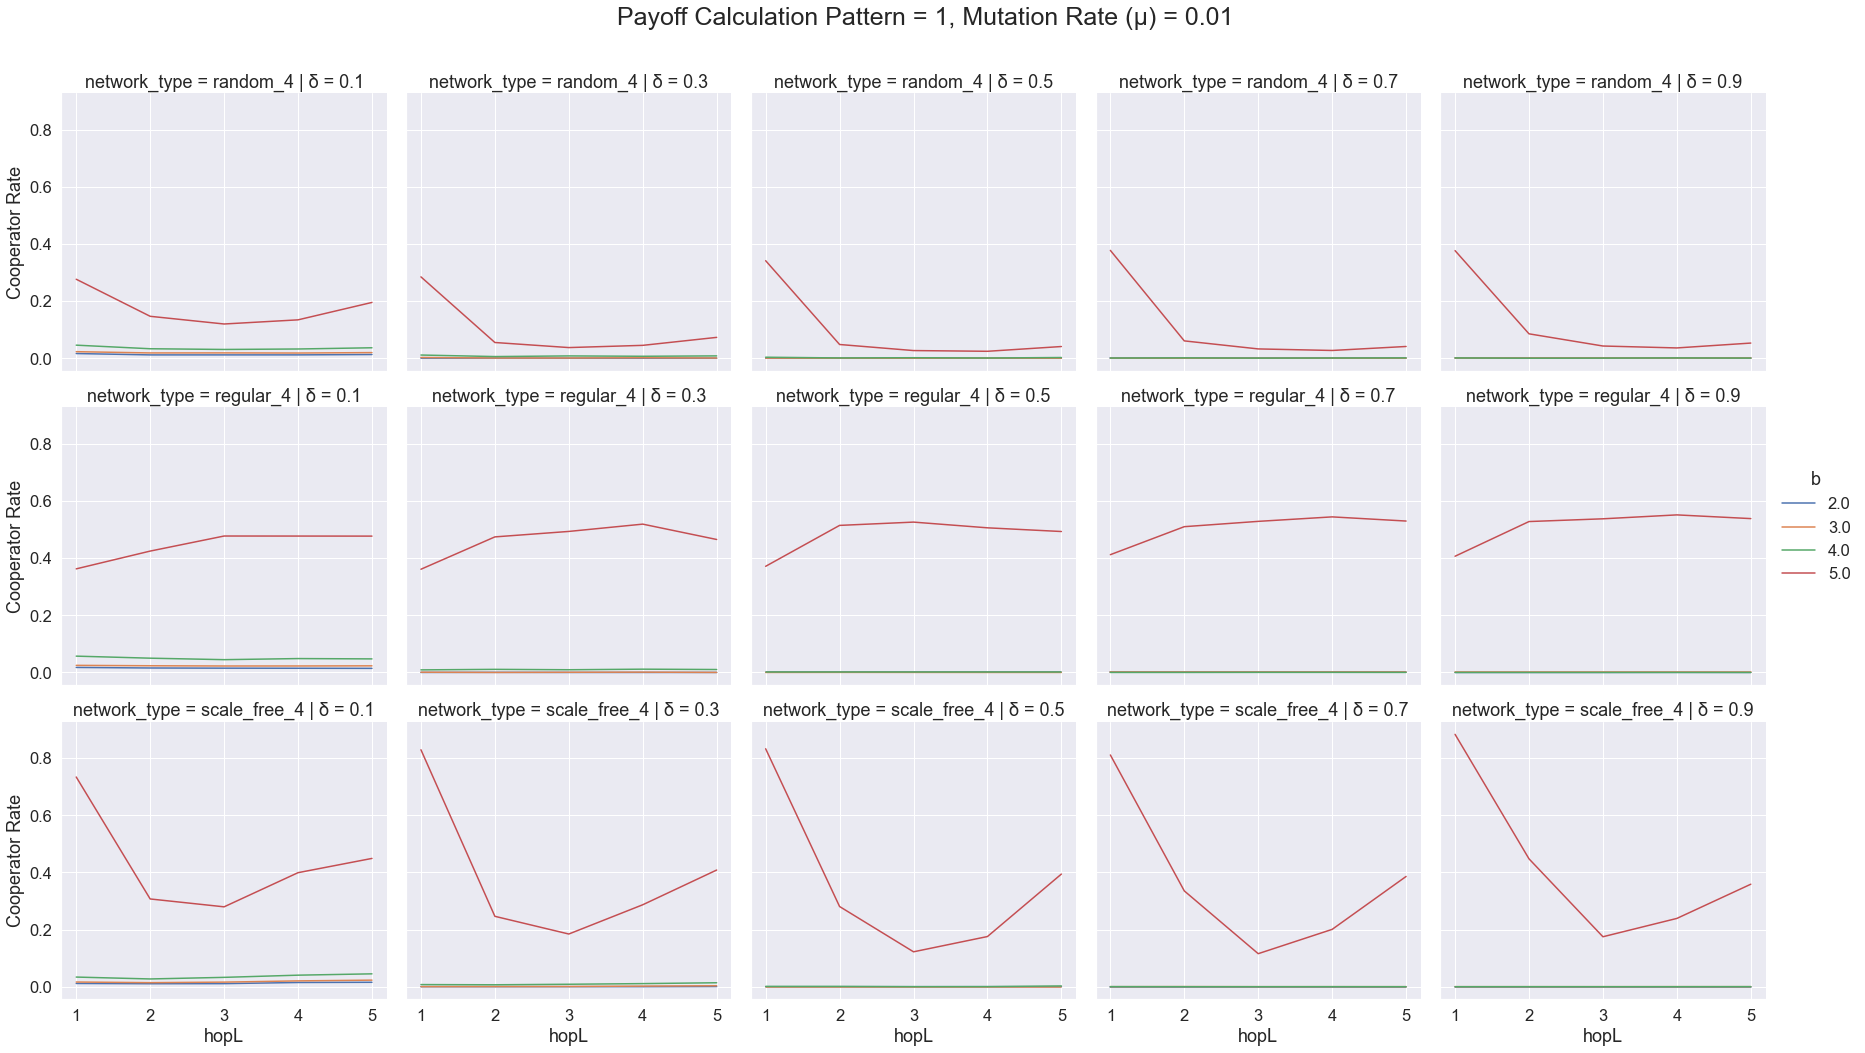

In [9]:
_μ = '0.01'
_calc_pattern = '1'
_network_type_list = ['regular_4', 'random_4', 'scale_free_4']

_df = df[(df.network_type.isin(_network_type_list)) & (df.μ == _μ) & (df.calc_pattern == _calc_pattern) & (df.δ != 'XX')]
g = sns.relplot(kind='line', x='hop_learning', y='cooperator_rate', hue='b', row='network_type', col='δ', data=_df)
g.set_axis_labels('hopL', 'Cooperator Rate')
g.fig.suptitle('Payoff Calculation Pattern = {}, Mutation Rate (μ) = {}'.format(_calc_pattern, _μ), size=25)
g.fig.subplots_adjust(top=.9)